<a href="https://colab.research.google.com/github/namek97/Code_accumulative/blob/main/Code_acd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#installing TA-LIB
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib
import talib as ta

--2023-03-12 12:18:53--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-12 12:18:53--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-12 12:18:53--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [2]:
#installing yfinance
!pip install yfinance 
import yfinance as yf
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",None)
import copy 
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 15.9 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

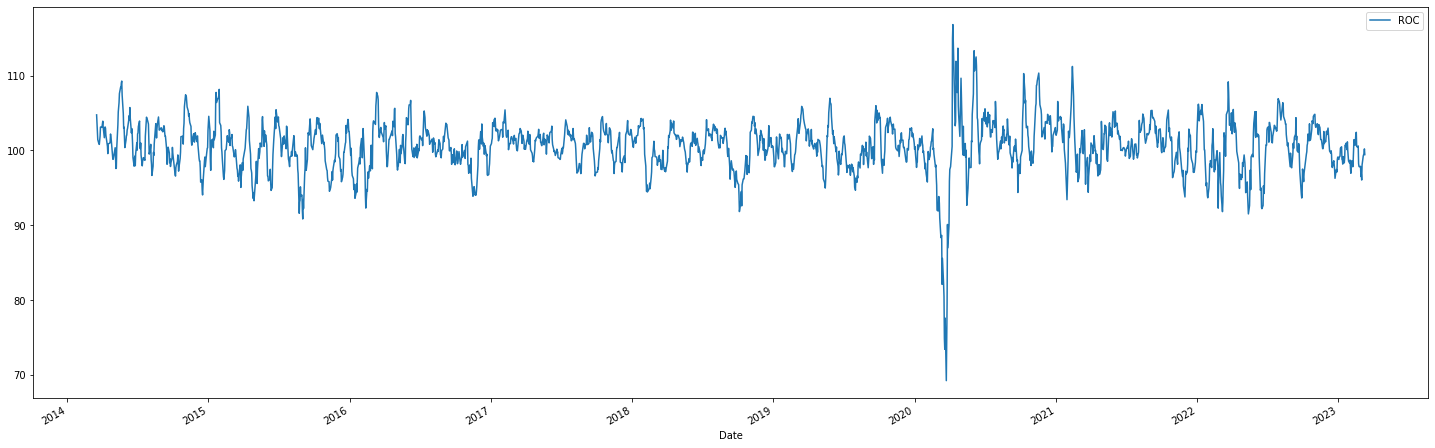

In [12]:
#stock_list=["^NSEI","NIFTYBEES.NS","^INDIAVIX"]

findat=pd.DataFrame()
dat = yf.Ticker("^NSEI")
df = dat.history(start="2014-03-03",interval="1d")
findat["Close"]=df["Close"]



#stochastic
findat['slowk'], findat['slowd'] = ta.STOCH(df['High'],df['Low'],df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
#rsi
findat['rsi']= ta.RSI(df['Close'], timeperiod=14)
#cci
findat['cci'] = ta.CCI(df['High'], df['Low'], df['Close'],timeperiod=14)
#macd
findat['macd'],findat['macdsignal'],findat['macdhist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
#apo
findat["APO"]= ta.APO(df['Close'], fastperiod=12, slowperiod=26, matype=0)
#AROON
findat["Aroon"]= ta.AROONOSC(df['High'],df['Low'], timeperiod=14)
#ultimate osc
findat["Ultosc"]= ta.ULTOSC(df['High'],df['Low'],df['Close'], timeperiod1=7, timeperiod2=14, timeperiod3=28)
#roc
findat["ROC"]=ta.ROCR100(df["Close"], timeperiod=10)
findat.tail()

findat[['ROC']].plot(figsize=(25,8))
plt.show()

In [13]:
findat

,Close,slowk,slowd,rsi,cci,macd,macdsignal,macdhist,APO,Aroon,Ultosc,ROC
Date,,,,,,,,,,,,
2014-03-03 00:00:00+05:30,6221.450195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-04 00:00:00+05:30,6297.950195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-05 00:00:00+05:30,6328.649902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-06 00:00:00+05:30,6401.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-07 00:00:00+05:30,6526.649902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-10 00:00:00+05:30,6537.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-11 00:00:00+05:30,6511.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-12 00:00:00+05:30,6516.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-13 00:00:00+05:30,6493.100098,71.388830,82.077860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
